In [13]:
import os

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
magvega = np.array([16.6, 15.6, 11.3, 8.0])
dm = np.array([2.699, 3.339, 5.174, 6.620])

In [16]:
fluxvega = 10**(22.5-magvega)
fluxab = fluxvega*10**(-dm/2.5)
magab = 22.5-np.log10(fluxab)

In [17]:
LSLGAdir = os.getenv('LSLGA_DIR')
galaxies = os.path.join(LSLGAdir, 'maglims.csv')

In [18]:
df = pd.read_csv(galaxies)
df

,wavelength,mag,survey,band
0,3.4000,17.7,WISE,W1
1,4.6000,16.9,WISE,W2
2,12.0000,13.4,WISE,W3
3,22.0000,10.6,WISE,W4
4,3.4000,18.2,UNWISE,W1
5,4.6000,17.4,UNWISE,W2
6,12.0000,13.4,UNWISE,W3
7,22.0000,10.6,UNWISE,W4
8,0.4640,23.1,SDSS,g
9,0.6580,22.7,SDSS,r


In [19]:
area = np.pi*(2.5)**2
mulim = df.mag-2.5*np.log10(area)
df['mulim'] = mulim

In [20]:
wise = df[df.survey == 'WISE']
unwise = df[df.survey == 'UNWISE']
sdss = df[df.survey == 'SDSS']
des = df[df.survey == 'DES']
ls = df[df.survey == 'LS']
twomass = df[df.survey == '2MASS']
galexa = df[df.survey == 'GALEXAIS']
galexm = df[df.survey == 'GALEXMIS']
galexd = df[df.survey == 'GALEXDIS']

In [21]:
df

,wavelength,mag,survey,band,mulim
0,3.4000,17.7,WISE,W1,14.467425
1,4.6000,16.9,WISE,W2,13.667425
2,12.0000,13.4,WISE,W3,10.167425
3,22.0000,10.6,WISE,W4,7.367425
4,3.4000,18.2,UNWISE,W1,14.967425
5,4.6000,17.4,UNWISE,W2,14.167425
6,12.0000,13.4,UNWISE,W3,10.167425
7,22.0000,10.6,UNWISE,W4,7.367425
8,0.4640,23.1,SDSS,g,19.867425
9,0.6580,22.7,SDSS,r,19.467425


Text(0,0.5,'$\\mu_{lim} (mag/arcsec^2)$')

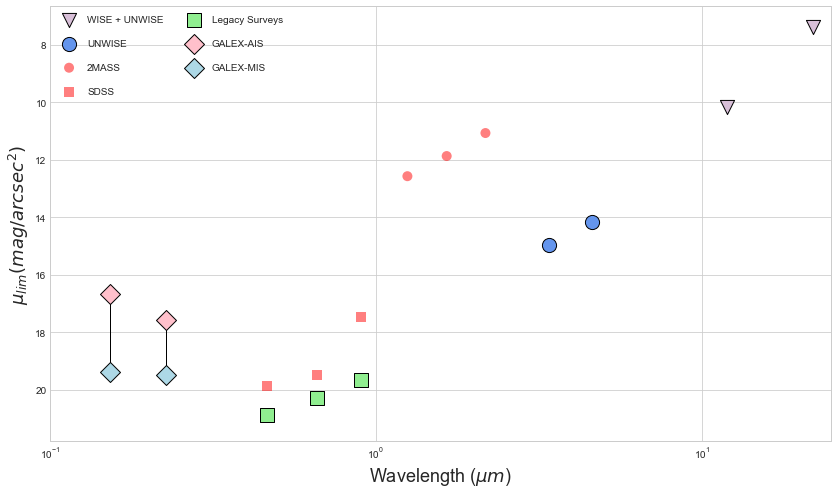

In [102]:
import pylab
sns.set_style("whitegrid")
plt.figure(figsize=(14,8))

plt.scatter(unwise.wavelength[2:], unwise.mulim[2:], s=200, facecolors='thistle', edgecolors='k', label='WISE + UNWISE', marker='v')
#plt.scatter(wise.wavelength[:2], wise.mulim[:2], s=200, facecolors='none', edgecolors='green', label='WISE', marker='p')
plt.scatter(unwise.wavelength[:2], unwise.mulim[:2], s=200, facecolors='cornflowerblue', edgecolors='k', label='UNWISE', marker='o')

plt.scatter(twomass.wavelength, twomass.mulim, s=100, facecolors='red', edgecolors='none', alpha=0.5, label='2MASS', marker='o')

plt.scatter(sdss.wavelength, sdss.mulim, s=100, facecolors='red', edgecolors='none', alpha=0.5,  label='SDSS', marker='s')
#plt.scatter(des.wavelength, des.mulim, s=100, label='DES')
plt.scatter(ls.wavelength, ls.mulim, s=200, facecolors='lightgreen', edgecolors='k', label='Legacy Surveys', marker='s')

plt.scatter(galexa.wavelength, galexa.mulim, s=200, facecolors='pink', edgecolors='k', label='GALEX-AIS', marker='D')
plt.scatter(galexm.wavelength, galexm.mulim, s=200, facecolors='lightblue', edgecolors='k', label='GALEX-MIS', marker='D')
plt.plot([galexa.wavelength.values[0], galexa.wavelength.values[0]], [galexa.mulim.values[0]+0.35, galexm.mulim.values[0]-0.35], color='k', linestyle='-', linewidth=1)
plt.plot([galexa.wavelength.values[1], galexa.wavelength.values[1]], [galexa.mulim.values[1]+0.35, galexm.mulim.values[1]-0.35], color='k', linestyle='-', linewidth=1)


#plt.scatter(galexd.wavelength, galexd.mulim, s=100, label='GALEX DIS', marker='s')
plt.legend(frameon=False, labelspacing=1.5, ncol=2)
plt.xscale('log')
plt.xlim([0.1, 25])
plt.gca().invert_yaxis()
plt.xlabel(r'Wavelength ($\mu m$)', size=18)
plt.ylabel(r'$\mu_{lim} (mag/arcsec^2)$', size=18)

Text(33.8544,0.5,'$\\mu_{lim} (mag/arcsec^2)$')

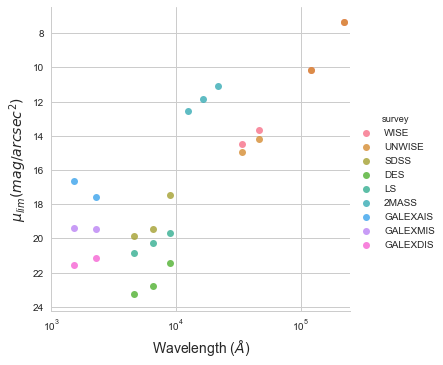

In [38]:
sns.lmplot(x='wavelength', y='mulim', data=df,
           fit_reg=False, # No regression line
           hue='survey') 
plt.xscale('log')
plt.xlim([1000, 250000])
plt.gca().invert_yaxis()
plt.xlabel(r'Wavelength ($\AA$)', size=14)
plt.ylabel(r'$\mu_{lim} (mag/arcsec^2)$', size=14)

In [169]:
omega = 4*np.pi*np.array([0.99998, 
                          14000*(np.pi/129600), 
                          1, 
                          26300*(np.pi/129600), 
                          14555*(np.pi/129600),
                          5000*(np.pi/129600)]) # 2mass, LS, WISE, GALEX, SDSS

In [170]:
muwise = df[np.logical_and(df.survey=='WISE', df.band=='W1')].mulim.values[0]
mu2mass = df[np.logical_and(df.survey=='2MASS', df.band=='Ks')].mulim.values[0]
muls = df[np.logical_and(df.survey=='LS', df.band=='r')].mulim.values[0]
mugalex = df[np.logical_and(df.survey=='GALEXAIS', df.band=='NUV')].mulim.values[0]
musdss = df[np.logical_and(df.survey=='SDSS', df.band=='r')].mulim.values[0]
mudes = df[np.logical_and(df.survey=='DES', df.band=='r')].mulim.values[0]

In [171]:
o2mass, ols, owise, ogalex, osdss, odes = omega

In [172]:
xx = np.linspace(0,4*np.pi,100)

Text(0,0.5,'Apparent Magnitude')

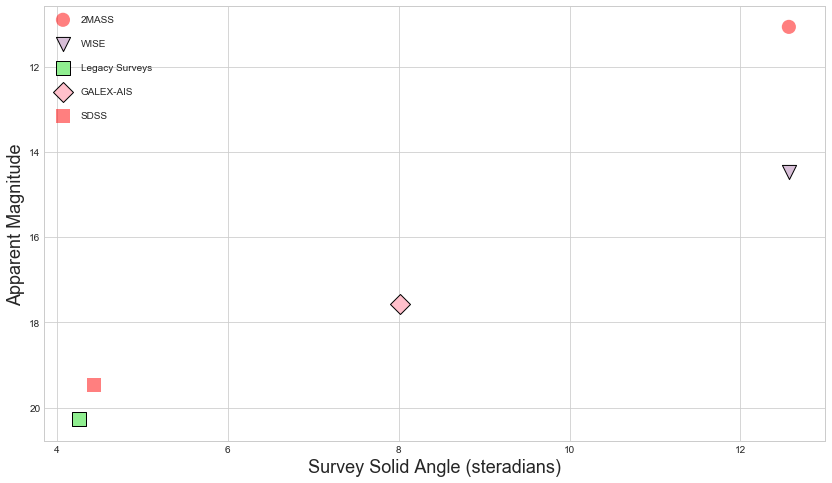

In [178]:
plt.figure(figsize=(14,8))
plt.scatter(o2mass, mu2mass, color='red', s=200, facecolors='red', edgecolors='none', alpha=0.5, label='2MASS', marker='o')
plt.scatter(owise, muwise, color='green', s=200, label='WISE', facecolors='thistle', edgecolors='k', marker='v')
plt.scatter(ols, muls, color='purple', s=200, facecolors='lightgreen', edgecolors='k', label='Legacy Surveys', marker='s')
plt.scatter(ogalex, mugalex, color='orange', s=200, facecolors='pink', edgecolors='k', label='GALEX-AIS', marker='D')
plt.scatter(osdss, musdss, color='pink', s=200, facecolors='red', edgecolors='none', alpha=0.5,  label='SDSS', marker='s')
#plt.scatter(odes, mudes, color='blue', s=200, label='DES')
plt.legend(frameon=False, labelspacing=1.5, ncol=1)
plt.gca().invert_yaxis()
plt.xlabel(r'Survey Solid Angle (steradians)', size=18)
plt.ylabel(r'Apparent Magnitude', size=18)